In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
#Load the dataset

df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
total_missing_percentage = df.isnull().mean().sum() * 100
print(f"Total percentage of missing values in the DataFrame: {total_missing_percentage:.2f}%")

Total percentage of missing values in the DataFrame: 0.00%


In [7]:
# Calculate the percentage of fraud and non-fraud transactions
# This will help us understand the class distribution and the level of imbalance in the dataset
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)

0    99.827251
1     0.172749
Name: Class, dtype: float64


In [8]:
#The Dataset is highly imbalanced

#0 --> Normal Transaction

#1 --> fraudulent transaction

<Axes: xlabel='Class', ylabel='count'>

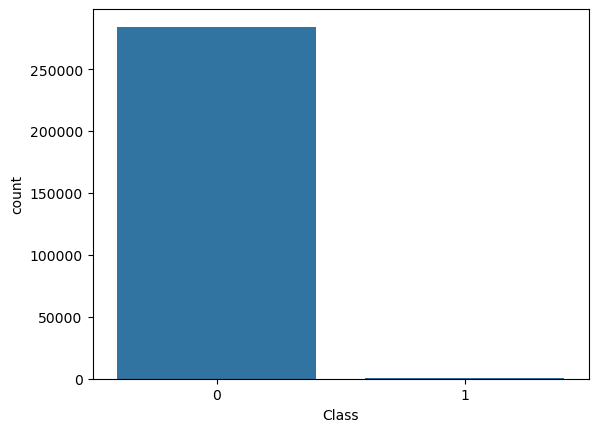

In [9]:
sns.countplot(data=df,x = 'Class')

In [10]:
#Lets separate the data for analysis

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
#Comparing the values for both transactions

df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

In [15]:
#Lets build a dataset containing similar distribution of normal transactions and Fraudulent Transactions

In [16]:
legit_sample = legit.sample(n=492) #Sample n=492 because fraud rows are 492

In [17]:
new_df = pd.concat([legit_sample, fraud], axis=0)

In [18]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202613,134416.0,2.121288,-0.014464,-2.699839,0.244616,0.962188,-0.929966,0.711555,-0.282066,-0.033094,...,0.264109,0.751554,-0.182123,0.385513,0.636170,0.700135,-0.150286,-0.103975,10.00,0
94429,64882.0,-1.189982,0.968159,0.200615,-1.817070,-0.914606,-0.761172,-0.495330,0.858653,-1.129882,...,-0.399214,-0.842624,0.036602,-0.490710,-0.385880,0.820000,0.156358,0.125857,1.00,0
182584,125467.0,1.976003,-0.469128,-0.752547,0.354374,-0.259679,-0.111036,-0.472534,-0.077815,1.016504,...,0.157032,0.521650,0.000648,-0.949646,-0.148294,0.411706,-0.020155,-0.044573,56.50,0
897,677.0,-0.371028,0.163148,2.731392,0.731217,-0.321304,0.840124,0.275887,-0.392287,1.670333,...,-0.343092,0.115927,-0.320990,-0.024246,-0.105633,0.381022,-0.400358,-0.559607,32.14,0
99213,67018.0,1.260278,0.219811,0.502665,0.624146,-0.516016,-1.000636,0.033374,-0.181512,0.108890,...,-0.262547,-0.779572,0.140994,0.363240,0.203818,0.096269,-0.031806,0.018074,1.79,0


In [19]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,90894.991870,0.007158,0.033725,-0.033237,-0.100164,0.031866,0.031559,0.041404,0.101681,-0.081484,...,0.051125,-0.002492,-0.006323,-0.039170,-0.012448,-0.012284,0.017850,0.007154,0.001823,95.454187
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features and Targets

In [20]:
X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [21]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
202613,134416.0,2.121288,-0.014464,-2.699839,0.244616,0.962188,-0.929966,0.711555,-0.282066,-0.033094,...,-0.348501,0.264109,0.751554,-0.182123,0.385513,0.636170,0.700135,-0.150286,-0.103975,10.00
94429,64882.0,-1.189982,0.968159,0.200615,-1.817070,-0.914606,-0.761172,-0.495330,0.858653,-1.129882,...,-0.520946,-0.399214,-0.842624,0.036602,-0.490710,-0.385880,0.820000,0.156358,0.125857,1.00
182584,125467.0,1.976003,-0.469128,-0.752547,0.354374,-0.259679,-0.111036,-0.472534,-0.077815,1.016504,...,-0.030715,0.157032,0.521650,0.000648,-0.949646,-0.148294,0.411706,-0.020155,-0.044573,56.50
897,677.0,-0.371028,0.163148,2.731392,0.731217,-0.321304,0.840124,0.275887,-0.392287,1.670333,...,0.348638,-0.343092,0.115927,-0.320990,-0.024246,-0.105633,0.381022,-0.400358,-0.559607,32.14
99213,67018.0,1.260278,0.219811,0.502665,0.624146,-0.516016,-1.000636,0.033374,-0.181512,0.108890,...,-0.120031,-0.262547,-0.779572,0.140994,0.363240,0.203818,0.096269,-0.031806,0.018074,1.79


In [22]:
y

202613    0
94429     0
182584    0
897       0
99213     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [23]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Creating a Logistic Regression model

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train,y_train)

C:\Users\gra301konlam\AppData\Local\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [27]:
y_pred = model.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9543147208121827
Confusion Matrix:
[[93  6]
 [ 3 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        99
           1       0.94      0.97      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [29]:
# The accuracy of 92.39% indicates the overall effectiveness of the model in correctly classifying transactions.
# High accuracy suggests that the model is reliable for predicting both legitimate and fraudulent transactions.

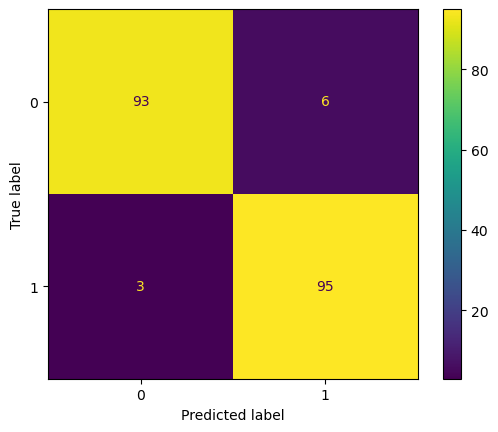

In [30]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [31]:
# The matrix shows that out of 99 legitimate transactions, 88 were correctly identified, and 11 were misclassified.
# For fraudulent transactions, 94 out of 98 were correctly identified, with only 4 misclassifications.

In [32]:
# Classification Report Breakdown:
# The precision, recall, and F1-score provide deeper insights into the model's performance.
# For legitimate transactions (class 0):
# - Precision of 0.96 indicates that 96% of transactions predicted as legitimate were indeed legitimate.
# - Recall of 0.89 means that the model correctly identified 89% of all legitimate transactions.
# - F1-score of 0.92 balances the precision and recall, indicating strong performance in identifying legitimate transactions.

In [33]:
# For fraudulent transactions (class 1):
# - Precision of 0.90 signifies that 90% of transactions predicted as fraudulent were truly fraudulent.
# - Recall of 0.96 indicates that the model successfully identified 96% of all fraudulent transactions.
# - F1-score of 0.93 highlights the model's excellent capability in detecting fraud.
